In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

np.random.seed(0)
plt.style.use('seaborn')

In [33]:
# set params
N, n_feature = 300, 5 
lr = 0.03
epochs = 30
batch_size = 32
n_batch = N // batch_size

t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, 1))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

In [34]:
# generate dataset
X_data = np.random.randn(N, n_feature)  # tensorflow에서는, 기본적으로 feature vector들을 전치된 상태로 다룸
# print(X.shape, t_W.shape, t_b.shape)
Y_data = X_data @ t_W + t_b
# print(X.shape, Y.shape)

In [35]:
J_track = list()
W_track, b_track = list(), list() 

for epoch in range(epochs):
    for batch_idx in range(n_batch):
        W_track.append(W)
        b_track.append(b)

        # get minibatch
        X = X_data[batch_idx * batch_size : (batch_idx+1) * batch_size]
        Y = Y_data[batch_idx * batch_size : (batch_idx+1) * batch_size]

        # forward propagation 
        pred = X @ W + b
        J0 = (Y - pred) ** 2
        J = np.mean(J0)
        J_track.append(J)

        # jacobians
        dJ_dJ0 = 1/batch_size * np.ones((1, batch_size))
        dJ0_dpred = np.diag(-2*(Y - pred).flatten())  # diag()의 parameter로 vector가 들어가야하기 때문!
        dpred_dW = X
        dpred_db = np.ones((batch_size, 1))

        # back propagation
        # print(dJ_dJ0.shape, dJ0_dpred.shape)
        dJ_dpred = dJ_dJ0 @ dJ0_dpred
        dJ_dW = dJ_dpred @ dpred_dW
        dJ_db = dJ_dpred @ dpred_db

        # parameter update
        W = W - lr*dJ_dW.T
        b = b - lr*dJ_db
        # print(W.shape, dJ_dW.shape)
        # print(b.shape, dJ_db.shape)

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)


In [37]:
print(W_track.shape, b_track.shape)

(5, 270) (270, 1)


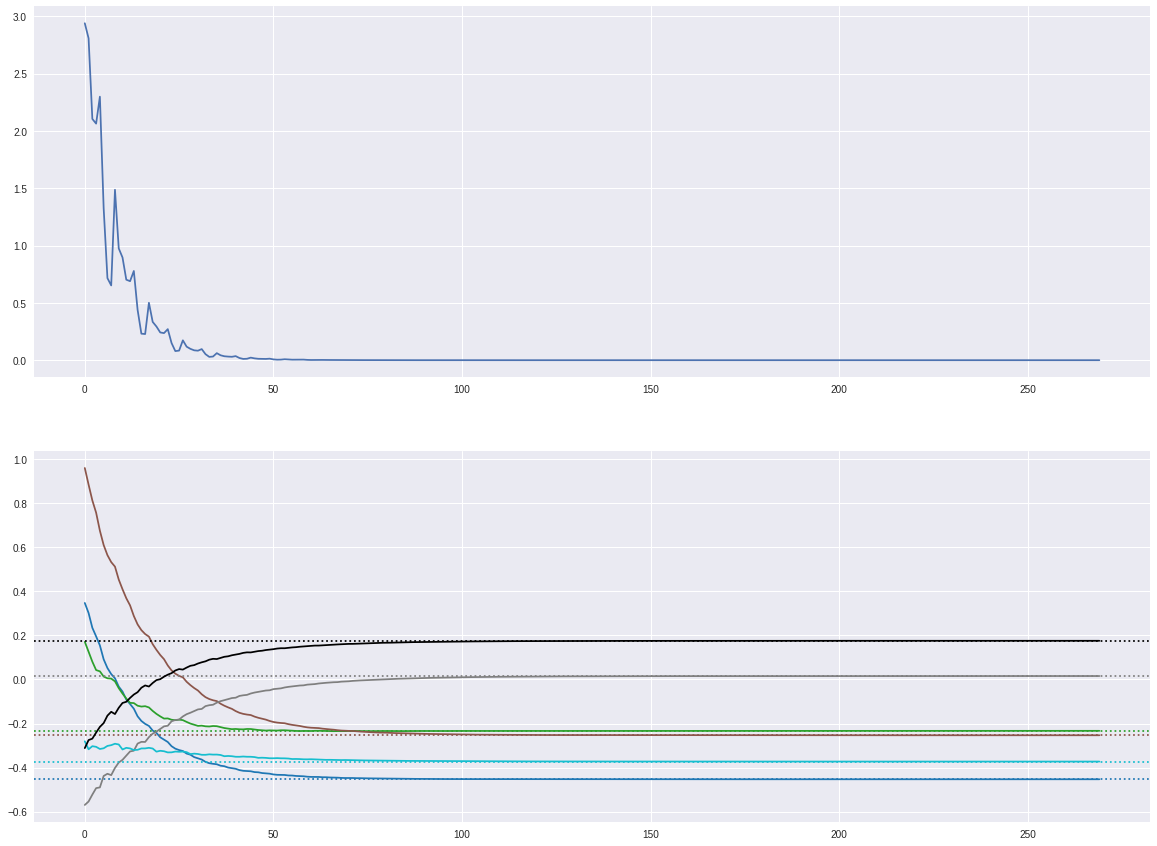

In [38]:
cmap = cm.get_cmap('tab10', n_feature) 
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes[0].plot(np.array(J_track))

for w_idx, (t_w, w_track) in enumerate(zip(t_W, W_track)):
    axes[1].axhline(y=t_w, linestyle=':', color=cmap(w_idx))
    axes[1].plot(w_track, color=cmap(w_idx))
axes[1].axhline(y=t_b, linestyle=':', color='black')
axes[1].plot(b_track, color='black')